# Unidade 1 Trabalho 2 - Análise de Assortatividade em Grafos de Ingredientes da Culinária Brasileira

<h3> Objetivo Geral </h3>

Construir um grafo de co-ocorrência de ingredientes a partir de pelo menos 50 receitas populares da culinária brasileira, classificar os ingredientes por tipo (proteína, carboidrato, vegetal etc.) e analisar a **assortatividade** do grafo com base nesses tipos, discutindo se a gastronomia brasileira tende a valorizar combinações homogêneas (entre ingredientes do mesmo tipo) ou contrastantes (entre tipos diferentes).

Os requisitos estão descritos no arquivo: [U1T2.pdf](./U1T2.pdf)

Coeficiente de assortatividade: -0.030880402717258972


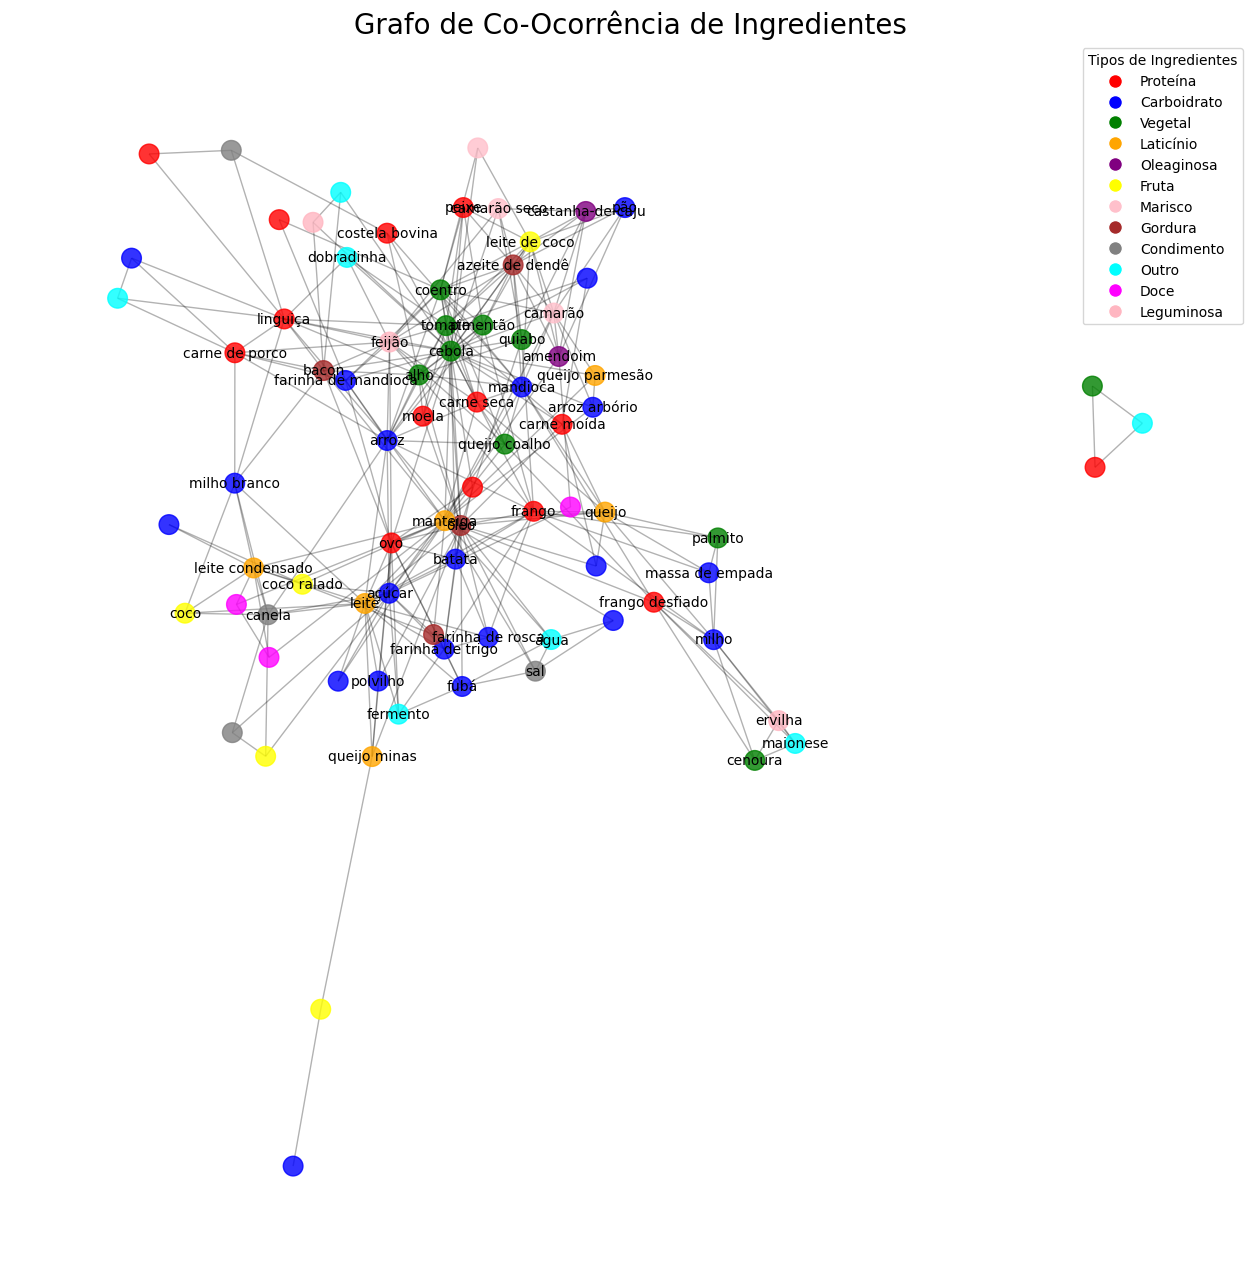

In [76]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("receitas_brasileiras.csv")

# Criar o grafo de co-ocorrência
G = nx.Graph()

for _, row in df.iterrows():
    ingredientes = row['ingredientes'].split(', ')
    for i in range(len(ingredientes)):
        for j in range(i + 1, len(ingredientes)):
            G.add_edge(ingredientes[i], ingredientes[j])

# Classificar os ingredientes por tipo
ingrediente_tipo = {}
for _, row in df.iterrows():
    ingredientes = row['ingredientes'].split(', ')
    tipos = row['tipos_ingredientes'].split(', ')
    for ingrediente, tipo in zip(ingredientes, tipos):
        ingrediente_tipo[ingrediente] = tipo
# ingrediente_tipo = {
    # 'feijão': 'Leguminosa', 
    # 'carne de porco': 'Proteína', 
    # 'arroz': 'Carboidrato', 
    # 'farinha de mandioca': 'Carboidrato', 
    # 'peixe': 'Proteína'
    # ...
# }

nx.set_node_attributes(G, ingrediente_tipo, name='tipo')

# Calcular a assortatividade
assortatividade = nx.attribute_assortativity_coefficient(G, attribute='tipo')
print(f"Coeficiente de assortatividade: {assortatividade}")

# Melhorar o layout
plt.figure(figsize=(16, 16))

# Usar o layout de força, mas com k maior (mais afastado)
pos = nx.spring_layout(G, k=0.5, iterations=100, seed=42)

# Cor dos nós
color_map = {
    "Proteína": "red",
    "Carboidrato": "blue",
    "Vegetal": "green",
    "Laticínio": "orange",
    "Oleaginosa": "purple",
    "Fruta": "yellow",
    "Marisco": "pink",
    "Gordura": "brown",
    "Condimento": "gray",
    "Outro": "cyan",
    "Doce": "magenta",
    "Leguminosa": "lightpink"
}

# Mapear as cores de acordo com os tipos dos ingredientes
node_colors = [color_map.get(G.nodes[node]['tipo'], "black") for node in G.nodes]

# Rótulo dos nós
labels = {
    node: node for node, degree in dict(G.degree()).items() 
    if degree > 3 # Só mostrar rótulo dos nós que têm grau acima de 3
    # if degree <= 3 # Só mostrar rótulo dos nós que têm grau abaixo ou iguais a 3
}

# Criar a legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
labels_legend = list(color_map.keys())
plt.legend(handles=handles, labels=labels_legend, title="Tipos de Ingredientes", loc='upper right')

# Desenhar
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels, font_size=10)

plt.title("Grafo de Co-Ocorrência de Ingredientes", fontsize=20)
plt.axis('off')
plt.show()


Coeficiente de assortatividade: -0.030880402717258972


c:\Users\vinic\AppData\Local\Programs\Python\Python312\Lib\site-packages\nxviz\api.py:299: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


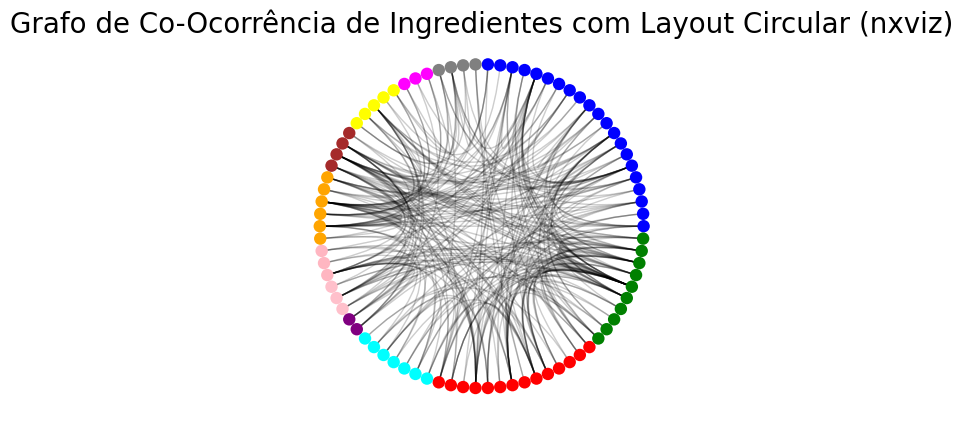

In [87]:
import pandas as pd
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("receitas_brasileiras.csv")

# Criar o grafo de co-ocorrência
G = nx.Graph()

for _, row in df.iterrows():
    ingredientes = row['ingredientes'].split(', ')
    for i in range(len(ingredientes)):
        for j in range(i + 1, len(ingredientes)):
            G.add_edge(ingredientes[i], ingredientes[j])

# Classificar os ingredientes por tipo
ingrediente_tipo = {}
for _, row in df.iterrows():
    ingredientes = row['ingredientes'].split(', ')
    tipos = row['tipos_ingredientes'].split(', ')
    for ingrediente, tipo in zip(ingredientes, tipos):
        ingrediente_tipo[ingrediente] = tipo

nx.set_node_attributes(G, ingrediente_tipo, name='tipo')

# Verificar os tipos de ingredientes
tipos_ingredientes = set(ingrediente_tipo.values())

# Calcular a assortatividade
assortatividade = nx.attribute_assortativity_coefficient(G, attribute='tipo')
print(f"Coeficiente de assortatividade: {assortatividade}")

# Definir o layout Circular
circular = nv.CircosPlot(G, node_grouping='tipo', node_color='tipo', node_palette={
    "Proteína": "red",
    "Carboidrato": "blue",
    "Vegetal": "green",
    "Laticínio": "orange",
    "Oleaginosa": "purple",
    "Fruta": "yellow",
    "Marisco": "pink",
    "Gordura": "brown",
    "Condimento": "gray",
    "Outro": "cyan",
    "Doce": "magenta",
    "Leguminosa": "lightpink"
})

# Ajustar o tamanho da figura
# fig, ax = plt.subplots(figsize=(16, 16))

# Desenhar o gráfico
# circular.draw()

# Adicionar título
plt.title("Grafo de Co-Ocorrência de Ingredientes com Layout Circular (nxviz)", fontsize=20)

# Criar a legenda manualmente
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in [
#     "red", "blue", "green", "orange", "purple", "yellow", "pink", "brown", "gray", "cyan", "magenta", "lightpink"]]
# plt.legend(handles=handles, labels=list(color_map.keys()), title="Tipos de Ingredientes")

# Exibir o gráfico
plt.show()


# Análise da Assortatividade e Hipóteses

O coeficiente de assortatividade obtido para o grafo de co-ocorrência de ingredientes foi de **-0,0309**. Esse valor, ligeiramente negativo e próximo de zero, indica que a combinação entre os ingredientes é quase aleatória, com uma pequena tendência à heterofilia — ou seja, há uma leve preferência por combinar ingredientes de tipos diferentes.

Esse resultado pode ser interpretado da seguinte forma:

- Não há uma forte separação dos ingredientes por tipo nas receitas analisadas.

- A mistura de tipos diferentes (ex.: proteínas com vegetais, carboidratos com gorduras) é ligeiramente mais comum do que a combinação de ingredientes do mesmo tipo.

Algumas hipóteses que podem explicar esse comportamento são:

- **Diversidade alimentar no Brasil:** a culinária brasileira é caracterizada por uma grande variedade de ingredientes, influenciada por diferentes regiões, culturas indígenas, africanas e europeias. Essa diversidade incentiva a mistura de diferentes tipos de alimentos em uma mesma preparação.

- **Reutilização de ingredientes:** muitos ingredientes populares (como cebola, alho, óleo, sal, arroz) aparecem repetidamente em diversas receitas, independentemente do tipo de prato (carnes, sopas, doces, etc.). Isso aumenta a chance de co-ocorrências entre tipos distintos.

- **Composição equilibrada dos pratos:** é comum que as receitas brasileiras busquem equilibrar proteínas, carboidratos e vegetais em um mesmo prato (por exemplo, feijoada, moqueca, baião de dois), o que naturalmente gera conexões entre categorias diferentes de ingredientes.

- **Flexibilidade nas combinações:** a culinária tradicional brasileira costuma ser adaptável, com trocas e substituições frequentes entre ingredientes, o que favorece a mistura de tipos variados.

Portanto, o resultado encontrado é coerente com a expectativa de uma culinária rica, diversa e não rígida em suas combinações de alimentos.